<h2>Features -> Log Transformation -> MinMaxScale -> LR model -> Target

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df= pd.read_csv('boston.csv', header=0,delimiter=',', encoding ='utf-8')
df = df[['AGE','LSTAT','MEDV']]
df[150:351]
x=df[['AGE','LSTAT']].values # input
y=df[['MEDV']].values # output
x=x.astype(float)
y=y.astype(float)

In [3]:
#chia tách ra training và testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=16)

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer

In [5]:
steps = [('logTransform',FunctionTransformer(np.log)),
        ('minmaxnormaline', MinMaxScaler()),
        ('modelLR',LinearRegression())]

In [6]:
pipe = Pipeline(steps)
pipe

Pipeline(steps=[('logTransform', FunctionTransformer(func=<ufunc 'log'>)),
                ('minmaxnormaline', MinMaxScaler()),
                ('modelLR', LinearRegression())])

In [7]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('logTransform', FunctionTransformer(func=<ufunc 'log'>)),
                ('minmaxnormaline', MinMaxScaler()),
                ('modelLR', LinearRegression())])

In [8]:
from sklearn import metrics
# test
y_test_pred = pipe.predict(x_test)

print('Score or R-Squared', pipe.score(x_test, y_test))

print('Mean absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

print('Mean absolute Percentage Error:', metrics.mean_absolute_percentage_error(y_test, y_test_pred))


Score or R-Squared 0.6699091200974046
Mean absolute Error: 3.483250221404044
Mean Squared Error: 21.8454439383473
Root Mean Squared Error: 4.673910989561879
Mean absolute Percentage Error: 0.19065805119386656


In [9]:
# TRAIN
y_train_pred = pipe.predict(x_train)

print('Score or R-Squared: ', pipe.score(x_train, y_train))
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_train, y_train_pred)) 
print('Mean Squared Error: ', metrics.mean_squared_error(y_train, y_train_pred)) 
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print('Mean Absolute Percentage Error: ', metrics.mean_absolute_percentage_error(y_train, y_train_pred))

Score or R-Squared:  0.6828895695649391
Mean Absolute Error:  3.881178685565849
Mean Squared Error:  27.732015809994646
Root Mean Squared Error:  5.266119615997594
Mean Absolute Percentage Error:  0.17976508321075704


c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

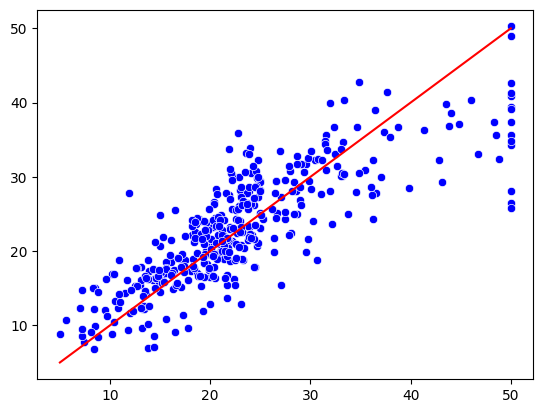

In [10]:
#Train
sns.scatterplot(x=y_train.flatten(), y=y_train_pred.flatten(),
                markers='0', color='b')
sns.lineplot(x=y_train.flatten(), y=y_train.flatten(),
            markers='o', color='r')
plt.show()

c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

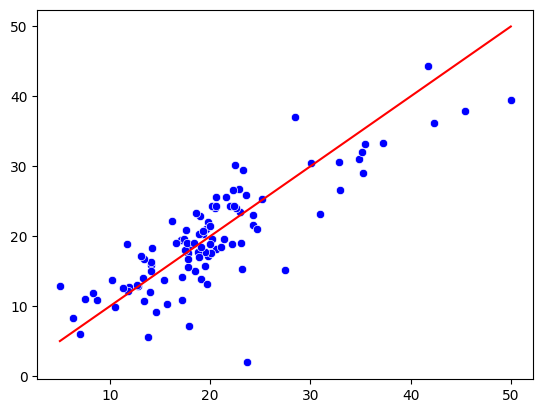

In [11]:
# biểu dồ Test
sns.scatterplot(x=y_test.flatten(), y=y_test_pred.flatten(),
                markers='o', color='b')
sns.lineplot(x=y_test.flatten(), y=y_test.flatten(),
            markers='o', color='r')
plt.show()


In [12]:
y_test_pred = pipe.predict(x_test)
dfTestValidation = pd.DataFrame(list(zip(x_test[:,0], x_test[:,1],
                                         y_test.flatten(),
                                         y_test_pred.flatten())),
                                         columns=['LSTAT_test', 'AGE_test', 'y_test',
                                                  'y_test_predicted'])
dfTestValidation['Residual'] = dfTestValidation['y_test'] - dfTestValidation['y_test_predicted']

dfTestValidation

,LSTAT_test,AGE_test,y_test,y_test_predicted,Residual
0,100.0,7.39,23.3,29.441866,-6.141866
1,93.9,22.88,12.8,12.807652,-0.007652
2,77.8,29.97,6.3,8.287155,-1.987155
3,51.8,6.58,35.2,29.049500,6.150500
4,98.4,14.59,17.1,19.498833,-2.398833
...,...,...,...,...,...
97,88.4,14.65,17.7,19.100159,-1.400159
98,25.8,9.97,19.3,20.801608,-1.501608
99,94.9,21.45,15.4,13.779719,1.620281
100,95.4,15.03,18.4,18.968807,-0.568807


In [13]:
y_train_pred = pipe.predict(x_train)
dftrainValidation = pd.DataFrame(list(zip(x_train[:,0], x_train[:,1],
                                         y_train.flatten(),
                                         y_train_pred.flatten())),
                                         columns=['LSTAT_train', 'AGE_train', 'y_train',
                                                  'y_train_predicted'])
dftrainValidation['Residual'] = dftrainValidation['y_train'] - dftrainValidation['y_train_predicted']

dftrainValidation

,LSTAT_train,AGE_train,y_train,y_train_predicted,Residual
0,92.7,18.06,15.2,16.207222,-1.007222
1,6.6,6.72,24.2,22.226214,1.973786
2,21.4,8.43,23.4,22.650165,0.749835
3,65.2,4.98,24.0,33.828889,-9.828889
4,40.5,3.95,31.6,35.692461,-4.092461
...,...,...,...,...,...
399,54.3,6.87,23.1,28.571379,-5.471379
400,33.0,8.79,20.9,23.412038,-2.512038
401,84.1,14.27,20.3,19.324620,0.975380
402,18.5,6.36,23.7,26.287195,-2.587195


c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

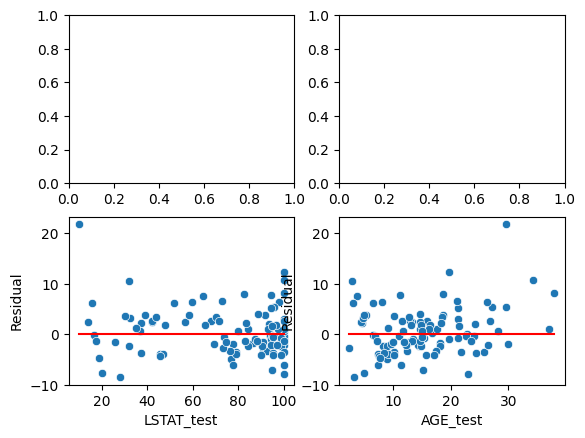

In [14]:

fig,axes=plt.subplots(2,2)
sns.scatterplot(data=dfTestValidation,x='LSTAT_test',y='Residual',ax=axes[1,0])
sns.lineplot(data=dfTestValidation,x='LSTAT_test',y=[0]*len(dfTestValidation),
             color='r',ax=axes[1,0])
sns.lineplot(data=dfTestValidation,x='AGE_test',y=[0]*len(dfTestValidation),
             color='r',ax=axes[1,1])
sns.scatterplot(data=dfTestValidation,x='AGE_test',y='Residual',ax=axes[1,1])
plt.show()



c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

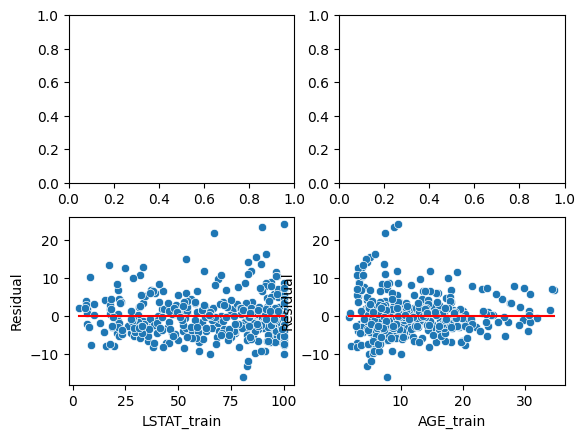

In [15]:
fig,axes=plt.subplots(2,2)
sns.scatterplot(data=dftrainValidation, x='LSTAT_train', y='Residual', ax=axes[1,0])
sns.lineplot(data=dftrainValidation, x='LSTAT_train', y=[0]*len(dftrainValidation),
             color = 'r', ax=axes[1,0])
sns.scatterplot(data=dftrainValidation, x='AGE_train', y='Residual', ax=axes[1,1])
sns.lineplot(data=dftrainValidation, x='AGE_train', y=[0]*len(dftrainValidation),
             color = 'r', ax=axes[1,1])
plt.show()



c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

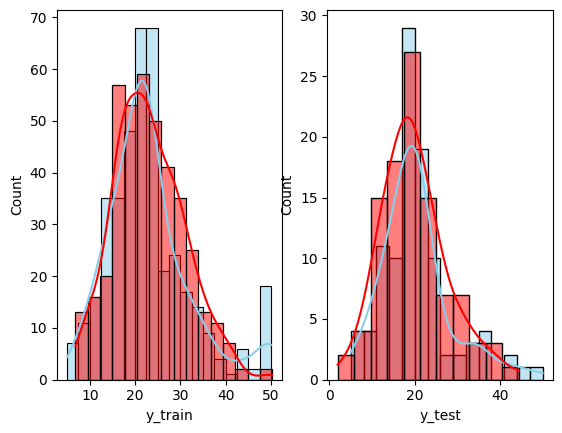

In [16]:
fig, axes = plt.subplots(1,2)

sns.histplot(data=dftrainValidation, x='y_train', color='skyblue',
              label='Actual', kde=True, ax=axes[0])
sns.histplot(data=dftrainValidation, x='y_train_predicted', color='red',
             label='Forecast', kde=True, ax=axes[0])
sns.histplot(data=dfTestValidation, x='y_test', color='skyblue',
              label='Actual', kde=True, ax=axes[1])
sns.histplot(data=dfTestValidation, x='y_test_predicted', color='red',
             label='Forecast', kde=True, ax=axes[1])
plt.show()